In [ ]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
IMAGE_SHAPE = (224, 224)
classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])

In [ ]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

In [ ]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [ ]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [ ]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [ ]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(224,224))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [ ]:
len(X)

3670

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
X_train_scaled = np.array(X_train) / 255
X_test_scaled = np.array(X_test) / 255

In [ ]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

In [ ]:
mod = keras.Sequential([
    pretrained_model_without_top_layer,
    keras.layers.Dense(5,activation='softmax')
])

In [ ]:
mod.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
            metrics=['acc'])
mod.fit(X_train_scaled,y_train,epochs=5)

NameError: ignored

In [ ]:
mod.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 2s 53ms/step - loss: 0.3802 - acc: 0.8769


[0.3802020847797394, 0.8769063353538513]

In [ ]:
lbl = dict()
for i in flowers_labels_dict:
    lbl[flowers_labels_dict[i]] = i
lbl

{0: 'roses', 1: 'daisy', 2: 'dandelion', 3: 'sunflowers', 4: 'tulips'}

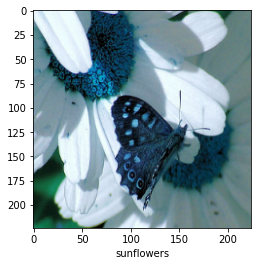

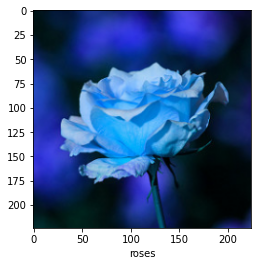

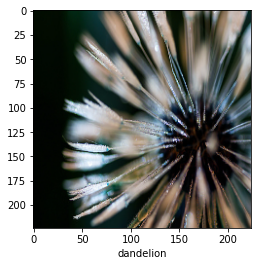

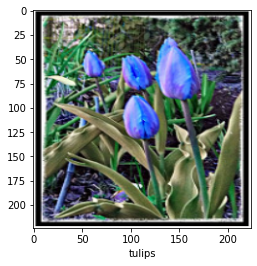

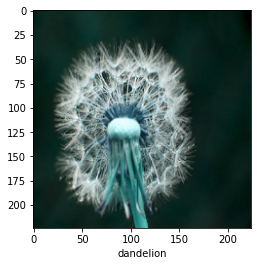

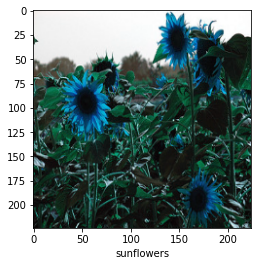

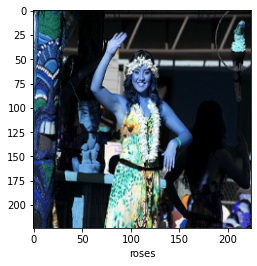

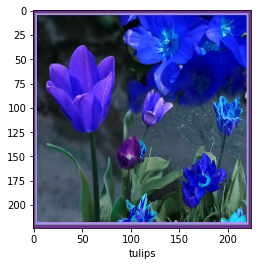

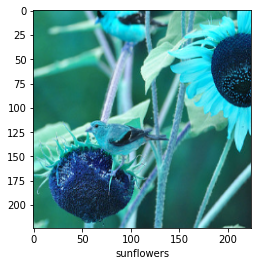

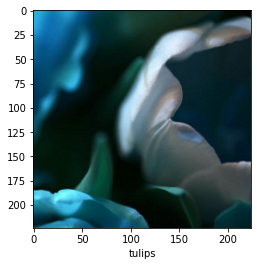

In [ ]:
y_pred = mod.predict(X_test_scaled[:10])
for i in range(10):
    x_l = lbl[np.argmax(y_pred[i])]
    # plt.figure(figsize=(2,2))
    plt.imshow(X_test[i])
    plt.xlabel(x_l)
    plt.show()